# Movie Recommender System 
###### Sathwik Kesappragada

Does the recommended section provide satisfaction? Are the movie suggestions popping up elevate anyone’s mood? Do the advertisements appearing in between Instagram posts catch anybody’s attention? Is there a system that gives better movie suggestions? 

From the moment an individual unlocks his/her phone till the moment he/she puts it away, every action being committed is tracked and monitored, stored into data, that is confidential information sold to big corporations. Pew Research states that 81% of Americans own smartphones creating a push for relevant and accurate promotions that will influence a user’s decision-making process and attract customers. With complex supervision, people with smartphones are being schemed to stay on their cellular devices for long periods of time to generate more revenue. Why? Companies with money can afford exceptional marketing. According to Business Wire, 60% of consumers click on cellphone ads every week suggesting how prevalent mobile advertising has become. Given these points, everyone is simply surrounded by recommender systems; people are constantly getting pitched ideas. From a simple Google search to a YouTube video to a Netflix original and to a song on Spotify, there exists a machine that advises its user based off abundant data. 

## Part I.) Data Wrangling

#### Imports

In [1]:
#call all import statements and their necessary pacakges
import sys
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns
import os
import missingno as msno 

In [2]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


In [3]:
#45466 movies 
movies.shape

(45466, 23)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, Toy Story to Queerama
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 

In [5]:
type(movies['budget'].iloc[0])
type(movies['popularity'].iloc[0])
#type(movies['genres'].iloc[0])

str

In [6]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

In [7]:
#returns all movie titles
movies.index

Index([                  'Toy Story',                     'Jumanji',
                  'Grumpier Old Men',           'Waiting to Exhale',
       'Father of the Bride Part II',                        'Heat',
                           'Sabrina',                'Tom and Huck',
                      'Sudden Death',                   'GoldenEye',
       ...
                  'House of Horrors',   'Shadow of the Blair Witch',
               'The Burkittsville 7',             'Caged Heat 3000',
                        'Robin Hood',                      'Subdue',
               'Century of Birthing',                    'Betrayal',
                  'Satan Triumphant',                    'Queerama'],
      dtype='object', name='title', length=45466)

In [8]:
#looking at one element
movies[movies.original_title == 'Toy Story'].transpose()

title,Toy Story
adult,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,3e+07
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [9]:
#want to redo, with function
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [11]:
#checking how many null values there are for each column/feature
missing = pd.concat([movies.isnull().sum(), 100 * movies.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
release_date,87,0.191352
status,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


<function matplotlib.pyplot.show(*args, **kw)>

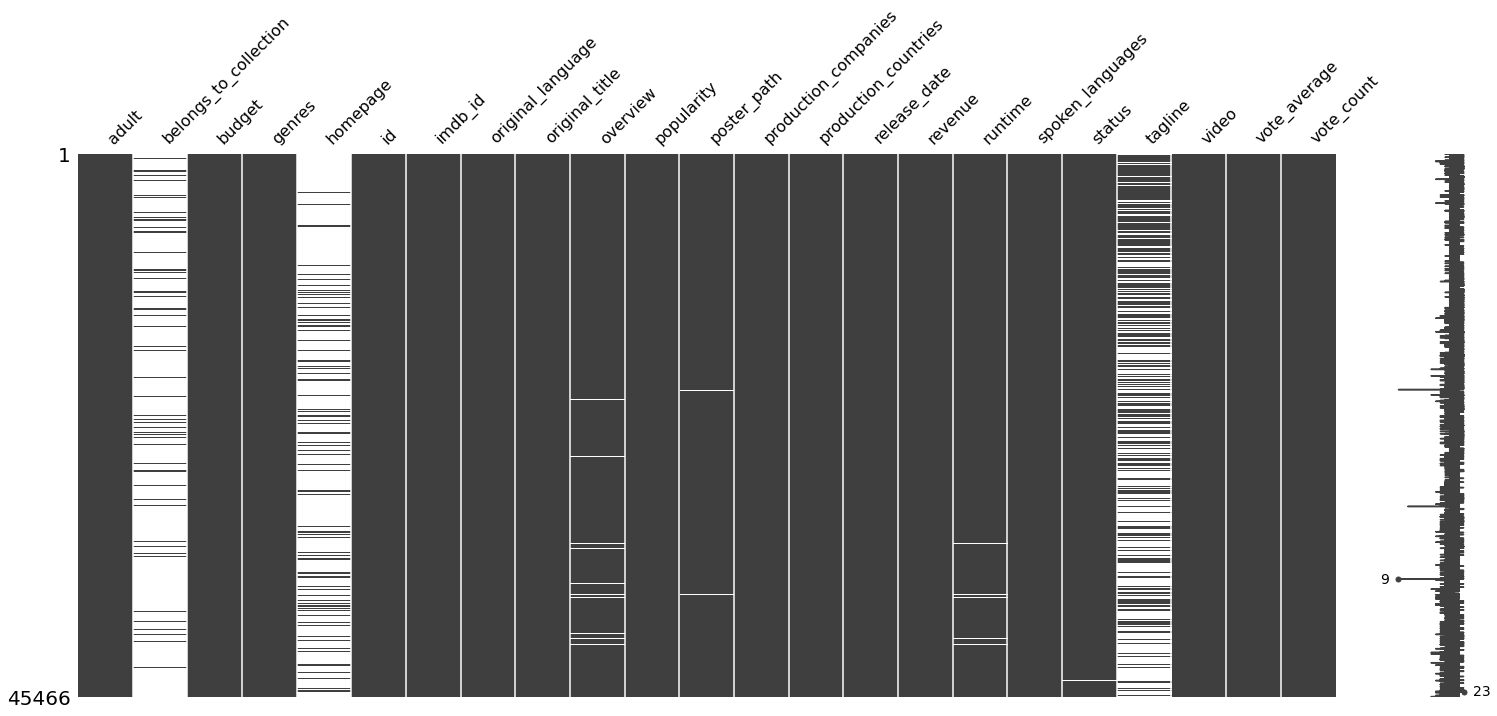

In [12]:
msno.matrix(movies)
plt.show

In [13]:
movies[movies['vote_average'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
NaN,FALSE,NaN,0.0,"[Action, Thriller, Drama]",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,- Written by Ørnås,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",8/20/1997,0,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0.0,"[Animation, Science Fiction]",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Rune Balot goes to a casino connected to the ...,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/29/2012,0,68,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,[],12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,NaN,0.0,"[TV Movie, Action, Horror, Science Fiction]",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalanche Sharks tells the story of a bikini ...,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1/1/2014,0,82,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#looking for duplicates in movie title
movies['original_title'].value_counts().head(15)

Alice in Wonderland              8
Hamlet                           8
A Christmas Carol                7
Les Misérables                   7
Macbeth                          7
The Three Musketeers             7
Cinderella                       7
King Lear                        6
Heidi                            6
Wuthering Heights                6
The Hound of the Baskervilles    6
Blackout                         6
Frankenstein                     6
Treasure Island                  6
Jane Eyre                        6
Name: original_title, dtype: int64

In [15]:
#sometimes movies with the same title are released
#you can tell theyre different by looking at release dates
movies[movies['original_title'] == 'Macbeth'].transpose()

title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,A Performance of Macbeth,Macbeth
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,1.5e+07,0,0
genres,[Drama],[Drama],[Thriller],"[Thriller, Drama, Action]","[History, Drama, War]","[Drama, Foreign]",[Drama]
homepage,NaN,NaN,NaN,NaN,http://www.macbeth-movie.com/,NaN,NaN
id,27883,115427,119844,13775,225728,41149,133448
imdb_id,tt0040558,tt0292081,tt0084284,tt0434541,tt2884018,tt0079499,tt1570337
original_language,en,hu,en,en,en,en,en
original_title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth
overview,Orson Welles' unique take on Shakespeare's cla...,A Hungarian TV version of the play shot in jus...,Macbeth and his wife murder Duncan in order to...,"Macbeth, loyal to his crime boss, Duncan, is t...",Feature film adaptation of Shakespeare's Scott...,"Shakespeare's classic tragedy of ambition, wit...",Part of the PBS Great Performance Series. Reno...


In [16]:
#another method to identify duplicates 
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Blackout, 12/26/2008               3
รักที่ขอนแก่น, 9/2/2015            2
Offside, 5/26/2006                 2
A Place at the Table, 3/22/2012    2
Pokémon 3: The Movie, 7/8/2000     2
                                  ..
The Bay, 9/13/2012                 1
Luton, 10/10/2013                  1
Le mouton enragé, 3/13/1974        1
Il mio domani, 11/4/2011           1
A Life of Her Own, 9/1/1950        1
Length: 45349, dtype: int64

In [17]:
#literally everything is same
movies[movies['original_title'] == 'Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0
genres,"[Thriller, Mystery]","[Thriller, Mystery]","[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,141971,141971,100063,226630,416951
imdb_id,tt1180333,tt1180333,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,fi,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [18]:
movies[['original_title', 'release_date']].nunique()

original_title    43371
release_date      17336
dtype: int64

In [19]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [20]:
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Trigger Man, 10/19/2007                   1
Mammoth, 4/22/2006                        1
Ik ook van jou, 2/15/2001                 1
The Last Play at Shea, 4/25/2010          1
Fright Night, 8/2/1985                    1
                                         ..
Mehed ei nuta, 1/1/1968                   1
Boxcar Bertha, 6/14/1972                  1
A Woman Under the Influence, 9/19/1974    1
Viceroy's House, 3/3/2017                 1
A Life of Her Own, 9/1/1950               1
Length: 45349, dtype: int64

In [21]:
movies[movies['original_title']=='Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN
budget,0,0,0,0
genres,"[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,100063,226630,416951
imdb_id,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [22]:
#checking to see how many 0s there are in each column
count_revenue_zero = sum(map(lambda x : x == 0, movies['revenue']))
print(count_revenue_zero)

count_budget_zero = sum(map(lambda x : x == 0, movies['budget']))
print(count_budget_zero)

#print(type(movies['popularity'].iloc[0]))
count_pop_zero = sum(map(lambda x : x == 0, movies['popularity']))
print(count_pop_zero)

count_runtime_zero = sum(map(lambda x : x == 0, movies['runtime']))
print(count_runtime_zero)

count_voteavg_zero = sum(map(lambda x : x == 0, movies['vote_average']))
print(count_voteavg_zero)

count_votecnt_zero = sum(map(lambda x: x == 0, movies['vote_count']))
print(count_votecnt_zero)

38032
36553
66
1558
2995
2896


In [23]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
oldest_movie_bydate = movies.release_date.min()
most_recent_bydate = movies.release_date.max()

In [24]:
print(oldest_movie_bydate)
print(most_recent_bydate)

1874-12-09 00:00:00
2020-12-16 00:00:00


In [25]:
movies[movies['release_date'] == oldest_movie_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Passage of Venus,FALSE,NaN,0.0,[Documentary],NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,[France],1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.0,19.0


In [26]:
movies[movies['release_date'] == most_recent_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0


In [27]:
movies[movies['release_date'] > '2018-01-01 00:00:00']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0
Bad Boys for Life,FALSE,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.0,"[Thriller, Action, Crime]",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,[United States of America],2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,False,0.0,12.0
Iron Sky: The Coming Race,FALSE,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000.0,"[Action, Comedy, Fantasy, Science Fiction]",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,"[Belgium, Finland, Germany]",2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,False,0.0,0.0
Mary Shelley,FALSE,NaN,0.0,"[Drama, Romance]",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
The Other Side of the Wind,FALSE,NaN,12000000.0,"[Comedy, Drama]",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,"[Iran, United States of America]",2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
Mobile Homes,FALSE,NaN,0.0,[Drama],NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[France, Canada]",2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0


In [28]:
movies['genres'].value_counts()

[Drama]                                                                           4996
[Comedy]                                                                          3620
[Documentary]                                                                     2721
[]                                                                                2442
[Drama, Romance]                                                                  1300
                                                                                  ... 
[Action, Adventure, Animation, Comedy, Family, Horror]                               1
[Drama, Thriller, Documentary]                                                       1
[Action, Animation, Comedy, Science Fiction]                                         1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [29]:
movies['genres'].filter(regex= 'Drama|Comedy').count()

59

In [30]:
#print(movies.columns.isin(movies.genres).any())
movies['num_genres'] = movies['genres'].str.len()
movies['num_genres']    

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45436, dtype: int64

In [31]:
movies['num_genres'].value_counts() #2442 movies don't have any genre 

1    14552
2    14471
3     9579
4     3378
0     2442
5      830
6      157
7       24
8        3
Name: num_genres, dtype: int64

In [32]:
movies['num_genres']

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45436, dtype: int64

In [33]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45433.0,4.224549e+06,1.742799e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
popularity,45430.0,2.921206e+00,6.006708e+00,0.0,0.385872,1.127238,3.678128,5.474883e+02
revenue,45430.0,1.121288e+07,6.435213e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
runtime,45173.0,9.412430e+01,3.841554e+01,0.0,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45430.0,5.618329e+00,1.924139e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45430.0,1.099360e+02,4.914663e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
num_genres,45436.0,2.003411e+00,1.130823e+00,0.0,1.000000,2.000000,3.000000,8.000000e+00


In [34]:
movie_with_one = movies[movies['num_genres'] == 1]

In [35]:
movie_with_one.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,14552.0,1.476017e+06,7.644903e+06,0.0,0.000000,0.000000,0.000000,1.900000e+08
popularity,14552.0,1.929592e+00,3.115950e+00,0.0,0.247577,0.766259,2.017234,6.429999e+01
revenue,14552.0,3.710493e+06,2.600311e+07,0.0,0.000000,0.000000,0.000000,1.506249e+09
runtime,14430.0,9.020312e+01,4.027209e+01,0.0,82.000000,92.000000,104.000000,1.140000e+03
vote_average,14552.0,5.582992e+00,2.117373e+00,0.0,5.000000,6.000000,6.900000,1.000000e+01
vote_count,14552.0,4.617159e+01,2.135003e+02,0.0,2.000000,7.000000,20.000000,9.678000e+03
num_genres,14552.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000,1.000000e+00


In [36]:
movie_with_two = movies[movies['num_genres'] == 2]

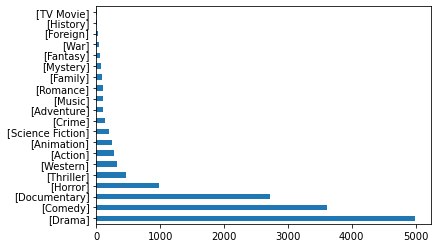

In [37]:
movie_with_one['genres'].value_counts().plot(kind='barh') # 20 unique single genres

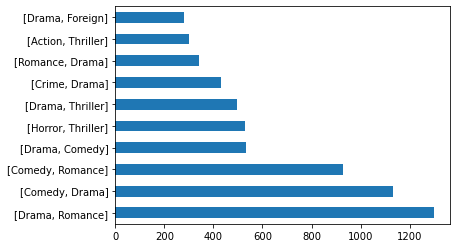

In [38]:
movie_with_two['genres'].value_counts().head(10).plot(kind ='barh') #303 unique pairs

In [39]:
movie_genres_key=movie_with_one['genres'].apply(lambda x: '_'.join((map(str,x))))

In [40]:
print(type(movie_genres_key))

<class 'pandas.core.series.Series'>


In [110]:
one_genre = movie_with_one.groupby(movie_genres_key).agg([np.mean, np.std]).reset_index()

In [ ]:
#, np.min, np.max, np.median, lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=75)

In [111]:
one_genre_df = pd.DataFrame(one_genre)
one_genre_df

genres        budget               popularity            \
                             mean           std       mean       std   
0            Action  4.572418e+06  1.744645e+07   2.781620  4.904922   
1         Adventure  7.870664e+06  2.310080e+07   2.672130  3.420682   
2         Animation  1.273816e+06  8.001286e+06   1.470265  2.333301   
3            Comedy  2.308151e+06  9.138128e+06   2.319682  3.303201   
4             Crime  1.676642e+05  1.570883e+06   0.795429  1.397349   
5       Documentary  7.654178e+04  9.729245e+05   0.839767  1.499874   
6             Drama  1.444392e+06  6.795743e+06   2.076730  3.280684   
7            Family  5.397802e+04  3.222319e+05   1.196871  1.404601   
8           Fantasy  5.214668e+06  2.117119e+07   2.564205  4.484648   
9           Foreign  0.000000e+00  0.000000e+00   0.295500  0.272522   
10          History  1.666667e+06  4.864840e+06   1.104759  1.630631   
11           Horror  8.799475e+05  3.610643e+06   2.592284  3.496425   
12            Music  6.668442e+05  3.544548e+06   1.018582  1.879204   
13          Mystery  1.488571e+05  9.885233e+05   0.989052  1.889868   
14          Romance  7.926804e+05  3.619914e+06   1.250001  1.774090   
15  Science Fiction  3.833623e+06  1.769418e+07   2.268901  3.548074   
16         TV Movie  0.000000e+00  0.000000e+00   0.874082  0.449468   
17         Thriller  1.844343e+06  7.669162e+06   2.585835  3.475072   
18              War  2.644595e+06  1.154516e+07   2.006420  5.731933   
19          Western  6.413421e+05  4.571157e+06   2.112993  3.421862   

         revenue                   runtime             vote_average            \
            mean           std        mean         std         mean       std   
0   1.080632e+07  9.359374e+07   98.446043   34.475476     5.444964  1.700656   
1   1.219243e+07  5.325056e+07  102.761468   39.675512     4.565455  2.350383   
2   2.602251e+06  2.062083e+07   32.137500   35.982008     6.118595  1.864348   
3   6.463372e+06  2.908611e+07   83.313378   30.524418     5.532514  1.919190   
4   1.191045e+01  1.378734e+02   84.255814   26.784230     4.770149  2.528128   
5   2.133014e+05  3.158019e+06   84.981919   57.298330     5.726204  2.643362   
6   3.550004e+06  2.373198e+07  100.902316   33.536063     5.846477  1.986093   
7   1.318689e+05  1.257942e+06   81.065934   26.725270     4.954945  2.058763   
8   6.303966e+06  2.676225e+07   76.980000   50.932725     5.566667  1.606321   
9   0.000000e+00  0.000000e+00   97.315789   53.249990     6.068421  1.874108   
10  1.768501e+06  6.849374e+06  121.133333  116.380452     5.046667  2.880691   
11  3.391715e+06  2.020216e+07   86.280576   19.786057     4.912834  1.516680   
12  6.550308e+05  4.016325e+06   93.027523   41.476334     5.462385  3.048430   
13  2.080012e+05  1.740263e+06   84.928571   27.451840     4.991429  2.350439   
14  4.932516e+06  2.321665e+07   87.147368   41.422054     5.181443  1.995168   
15  6.042526e+06  4.304793e+07   88.377551   66.647718     4.790909  1.705208   
16  0.000000e+00  0.000000e+00  125.714286  191.417270     6.228571  1.479543   
17  2.566891e+06  1.516109e+07   91.819957   28.687145     5.196774  1.613337   
18  4.047900e+06  1.665211e+07  101.162162   39.102084     5.556757  2.120474   
19  1.693802e+06  1.091139e+07   92.103774   28.152781     4.772327  2.407557   

   vote_count             num_genres       
         mean         std       mean  std  
0   72.863309  348.051030          1  0.0  
1   64.372727  188.093177          1  0.0  
2   26.909091   74.401289          1  0.0  
3   66.720718  237.915406          1  0.0  
4    5.104478    6.355707          1  0.0  
5   11.161338   29.354039          1  0.0  
6   49.471377  251.137035          1  0.0  
7    9.076923   12.145626          1  0.0  
8   72.254902  209.798746          1  0.0  
9    4.263158    4.688545          1  0.0  
10  15.333333   41.700748          1  0.0  
11  58.485626  176.957138          1  0.0  
12  15.440367   54.415315    

In [112]:
one_genre_df[['genres','vote_average']].columns.levels

FrozenList([['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'num_genres', 'genres'], ['mean', 'std', '']])

In [46]:
one_genre_df['budget']

,mean,std
0,4.572418e+06,1.744645e+07
1,7.870664e+06,2.310080e+07
2,1.273816e+06,8.001286e+06
3,2.308151e+06,9.138128e+06
4,1.676642e+05,1.570883e+06
5,7.654178e+04,9.729245e+05
6,1.444392e+06,6.795743e+06
7,5.397802e+04,3.222319e+05
8,5.214668e+06,2.117119e+07
9,0.000000e+00,0.000000e+00


In [116]:
df_one = one_genre_df.copy(deep=True)
df_one

genres        budget               popularity            \
                             mean           std       mean       std   
0            Action  4.572418e+06  1.744645e+07   2.781620  4.904922   
1         Adventure  7.870664e+06  2.310080e+07   2.672130  3.420682   
2         Animation  1.273816e+06  8.001286e+06   1.470265  2.333301   
3            Comedy  2.308151e+06  9.138128e+06   2.319682  3.303201   
4             Crime  1.676642e+05  1.570883e+06   0.795429  1.397349   
5       Documentary  7.654178e+04  9.729245e+05   0.839767  1.499874   
6             Drama  1.444392e+06  6.795743e+06   2.076730  3.280684   
7            Family  5.397802e+04  3.222319e+05   1.196871  1.404601   
8           Fantasy  5.214668e+06  2.117119e+07   2.564205  4.484648   
9           Foreign  0.000000e+00  0.000000e+00   0.295500  0.272522   
10          History  1.666667e+06  4.864840e+06   1.104759  1.630631   
11           Horror  8.799475e+05  3.610643e+06   2.592284  3.496425   
12            Music  6.668442e+05  3.544548e+06   1.018582  1.879204   
13          Mystery  1.488571e+05  9.885233e+05   0.989052  1.889868   
14          Romance  7.926804e+05  3.619914e+06   1.250001  1.774090   
15  Science Fiction  3.833623e+06  1.769418e+07   2.268901  3.548074   
16         TV Movie  0.000000e+00  0.000000e+00   0.874082  0.449468   
17         Thriller  1.844343e+06  7.669162e+06   2.585835  3.475072   
18              War  2.644595e+06  1.154516e+07   2.006420  5.731933   
19          Western  6.413421e+05  4.571157e+06   2.112993  3.421862   

         revenue                   runtime             vote_average            \
            mean           std        mean         std         mean       std   
0   1.080632e+07  9.359374e+07   98.446043   34.475476     5.444964  1.700656   
1   1.219243e+07  5.325056e+07  102.761468   39.675512     4.565455  2.350383   
2   2.602251e+06  2.062083e+07   32.137500   35.982008     6.118595  1.864348   
3   6.463372e+06  2.908611e+07   83.313378   30.524418     5.532514  1.919190   
4   1.191045e+01  1.378734e+02   84.255814   26.784230     4.770149  2.528128   
5   2.133014e+05  3.158019e+06   84.981919   57.298330     5.726204  2.643362   
6   3.550004e+06  2.373198e+07  100.902316   33.536063     5.846477  1.986093   
7   1.318689e+05  1.257942e+06   81.065934   26.725270     4.954945  2.058763   
8   6.303966e+06  2.676225e+07   76.980000   50.932725     5.566667  1.606321   
9   0.000000e+00  0.000000e+00   97.315789   53.249990     6.068421  1.874108   
10  1.768501e+06  6.849374e+06  121.133333  116.380452     5.046667  2.880691   
11  3.391715e+06  2.020216e+07   86.280576   19.786057     4.912834  1.516680   
12  6.550308e+05  4.016325e+06   93.027523   41.476334     5.462385  3.048430   
13  2.080012e+05  1.740263e+06   84.928571   27.451840     4.991429  2.350439   
14  4.932516e+06  2.321665e+07   87.147368   41.422054     5.181443  1.995168   
15  6.042526e+06  4.304793e+07   88.377551   66.647718     4.790909  1.705208   
16  0.000000e+00  0.000000e+00  125.714286  191.417270     6.228571  1.479543   
17  2.566891e+06  1.516109e+07   91.819957   28.687145     5.196774  1.613337   
18  4.047900e+06  1.665211e+07  101.162162   39.102084     5.556757  2.120474   
19  1.693802e+06  1.091139e+07   92.103774   28.152781     4.772327  2.407557   

   vote_count             num_genres       
         mean         std       mean  std  
0   72.863309  348.051030          1  0.0  
1   64.372727  188.093177          1  0.0  
2   26.909091   74.401289          1  0.0  
3   66.720718  237.915406          1  0.0  
4    5.104478    6.355707          1  0.0  
5   11.161338   29.354039          1  0.0  
6   49.471377  251.137035          1  0.0  
7    9.076923   12.145626          1  0.0  
8   72.254902  209.798746          1  0.0  
9    4.263158    4.688545          1  0.0  
10  15.333333   41.700748          1  0.0  
11  58.485626  176.957138          1  0.0  
12  15.440367   54.415315    

In [56]:
df_one['budget'].columns

Index(['mean', 'std'], dtype='object')

In [57]:
df_one.columns

MultiIndex([(      'genres',     ''),
            (      'budget', 'mean'),
            (      'budget',  'std'),
            (  'popularity', 'mean'),
            (  'popularity',  'std'),
            (     'revenue', 'mean'),
            (     'revenue',  'std'),
            (     'runtime', 'mean'),
            (     'runtime',  'std'),
            ('vote_average', 'mean'),
            ('vote_average',  'std'),
            (  'vote_count', 'mean'),
            (  'vote_count',  'std'),
            (  'num_genres', 'mean'),
            (  'num_genres',  'std')],
           )

In [58]:
df_one.columns.levels[1]

Index(['mean', 'std', ''], dtype='object')

In [59]:
df_one.columns = ['genres','budget_mean','budget_std','popularity_mean', 'popularity_std', 'revenue_mean','revenue_std', 
                 'runtime_mean', 'runtime_std', 'vote_average_mean', 'vote_average_std', 'vote_count_mean', 'vote_count_std',
                 'num_genres_mean','num_genres_std']

In [60]:
df_one

,genres,budget_mean,budget_std,popularity_mean,popularity_std,revenue_mean,revenue_std,runtime_mean,runtime_std,vote_average_mean,vote_average_std,vote_count_mean,vote_count_std,num_genres_mean,num_genres_std
0,Action,4.572418e+06,1.744645e+07,2.781620,4.904922,1.080632e+07,9.359374e+07,98.446043,34.475476,5.444964,1.700656,72.863309,348.051030,1,0.0
1,Adventure,7.870664e+06,2.310080e+07,2.672130,3.420682,1.219243e+07,5.325056e+07,102.761468,39.675512,4.565455,2.350383,64.372727,188.093177,1,0.0
2,Animation,1.273816e+06,8.001286e+06,1.470265,2.333301,2.602251e+06,2.062083e+07,32.137500,35.982008,6.118595,1.864348,26.909091,74.401289,1,0.0
3,Comedy,2.308151e+06,9.138128e+06,2.319682,3.303201,6.463372e+06,2.908611e+07,83.313378,30.524418,5.532514,1.919190,66.720718,237.915406,1,0.0
4,Crime,1.676642e+05,1.570883e+06,0.795429,1.397349,1.191045e+01,1.378734e+02,84.255814,26.784230,4.770149,2.528128,5.104478,6.355707,1,0.0
5,Documentary,7.654178e+04,9.729245e+05,0.839767,1.499874,2.133014e+05,3.158019e+06,84.981919,57.298330,5.726204,2.643362,11.161338,29.354039,1,0.0
6,Drama,1.444392e+06,6.795743e+06,2.076730,3.280684,3.550004e+06,2.373198e+07,100.902316,33.536063,5.846477,1.986093,49.471377,251.137035,1,0.0
7,Family,5.397802e+04,3.222319e+05,1.196871,1.404601,1.318689e+05,1.257942e+06,81.065934,26.725270,4.954945,2.058763,9.076923,12.145626,1,0.0
8,Fantasy,5.214668e+06,2.117119e+07,2.564205,4.484648,6.303966e+06,2.676225e+07,76.980000,50.932725,5.566667,1.606321,72.254902,209.798746,1,0.0
9,Foreign,0.000000e+00,0.000000e+00,0.295500,0.272522,0.000000e+00,0.000000e+00,97.315789,53.249990,6.068421,1.874108,4.263158,4.688545,1,0.0


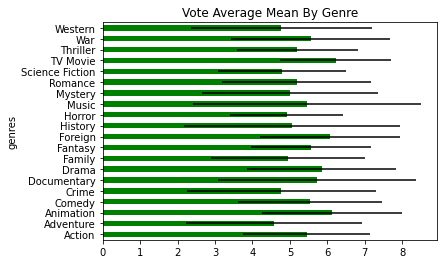

In [64]:
df_one.plot(kind = "barh", y = "vote_average_mean", legend = False,  
          xerr = "vote_average_std", title = "Vote Average Mean By Genre", color='green', x= 'genres')

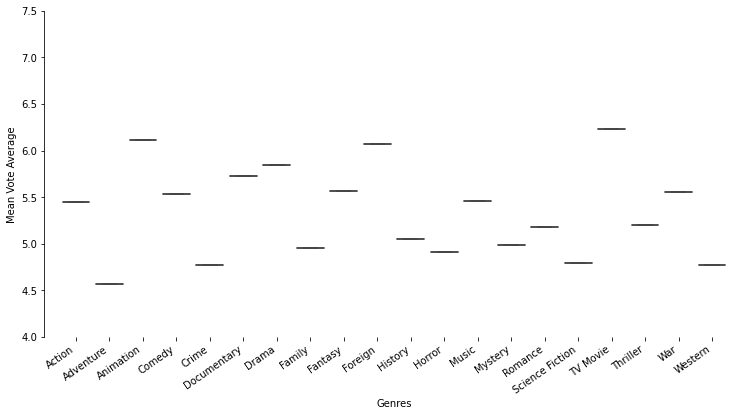

In [100]:
fig, ax = plt.subplots(1, figsize=(12,6))

sns.boxplot(y='vote_average_mean', x = 'genres', data =df_one)
sns.despine(bottom=True, offset =15)

plt.xticks(rotation=35, ha='right')
plt.yticks(np.arange(4,8,0.5)) 
plt.xlabel('Genres')
plt.ylabel('Mean Vote Average')
#plt.title("Mean Vote Average By Genre")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

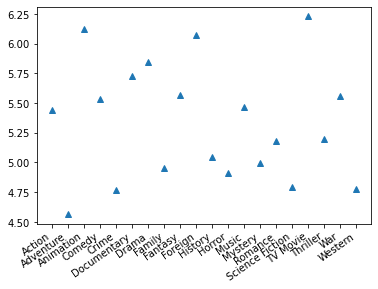

In [109]:
plt.errorbar(y = "vote_average_mean", x= 'genres', linestyle='None', marker='^', data = df_one)
plt.xticks(rotation=35, ha='right')

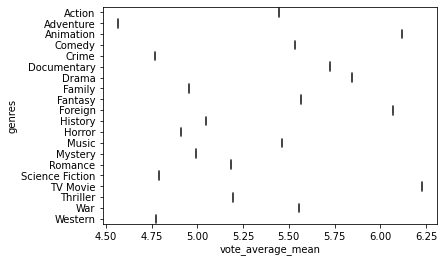

In [77]:
sns.boxplot(data=df_one, y='genres', x='vote_average_mean',orient = 'h', dodge=True)

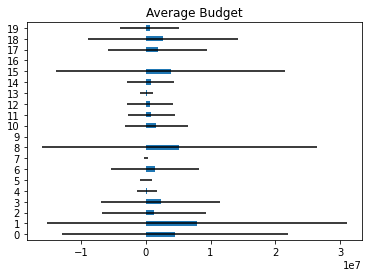

In [101]:
df_one.plot(kind = "barh", y = "budget_mean", legend = False, 
            title = "Average Budget", xerr = "budget_std") 

In [ ]:
ax = sns.barplot(data=one_genre_df['vote_average'], y=one_genre_df['genres'], x= "mean", orient="h")

In [ ]:
ax = sns.barplot(data = one_genre_df['vote_average'], y=one_genre_df.index, x= "std", orient="h")

In [ ]:
ax = sns.boxplot(data = one_genre_df['vote_average'], y=one_genre_df.index, x= 'std', orient="h" )

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mean", y="std", hue=one_genre_df.index, data=one_genre_df['vote_average']);

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=one_genre_df['vote_average']['mean'])

In [ ]:
movie_with_one[movie_genres_key == 'TV Movie']

In [ ]:
pap = sns.barplot(data=one_genre_df['popularity'], y=one_genre_df.index, x= 'mean', orient="h")

In [ ]:
vcap = sns.barplot(data=one_genre_df['vote_count'], y=one_genre_df.index, x= 'mean', orient="h")

In [ ]:
r = sns.relplot(data=one_genre_df['popularity'], x="mean", y="std", hue=one_genre_df.index)

In [ ]:
mgk=movies['genres'].apply(lambda x: '_'.join((map(str,x))))

In [ ]:
all_movies = movies.groupby(mgk).agg([np.mean, np.std]) 
all_movies

In [ ]:
y = all_movies[all_movies['vote_count', 'mean'] > 5000]
#y= all_movies[all_movies['vote_average', 'mean'] > 7.0]
mvap = sns.barplot(data=y['vote_average'], y=y.index, x= 'mean', orient="h")

In [ ]:
movies.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [ ]:
g = sns.PairGrid(all_movies, vars=['vote_average', 'budget', 'runtime', 'vote_count', 'revenue'], palette='RdBu_r')
g.map(plt.scatter, alpha=0.8);

In [ ]:
all_movies.columns

In [ ]:
movies[mgk.str.contains('Drama')].describe()

In [ ]:
ratings = pd.read_csv('C:/Users/sathw/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/ratings.csv', nrows = 200000, low_memory = False)
ratings.head()

In [ ]:
ratings = ratings.rename(columns = {'movieId': 'id'})

In [ ]:
ratings.id = ratings.id.astype(float)

In [ ]:
ratings.info()

In [ ]:
#movie_small = movie_small.rename(columns = {'original_title': 'title'})

In [ ]:
#movie_small.head()

In [ ]:
#movie_small.dtypes

In [ ]:
#movie_small['id'] = pd.to_numeric(movie_small['id'], errors = 'coerce')

In [ ]:
#movie_small.dtypes

In [ ]:
#movie_small.isnull().sum()

In [ ]:
#movie_small[movie_small['id'].isna()]

In [ ]:
#movie_small_non = movie_small[movie_small['vote_average'].notna()]

In [ ]:
#movie_small_non.head()

In [ ]:
#movie_small_non.count()

In [ ]:
#combined_df = pd.merge(diff_look_clean,ratings, on = 'id')

In [ ]:
#combined_df.info()

movie['post_proc'] = movie[genres'].apply(clean, axis=1)

In [ ]:
#combined_df.head(10)

In [ ]:
#movie_small = pd.melt(movies, id_vars = 'original_title', value_vars = ['genres'], value_name = 'Genre')

#movie_small = pd.melt(movies, 
#                        id_vars = ['original_title', 'vote_average', 'vote_count', 'id', 'genres', 
#                                   'popularity','release_date', 'budget', 'revenue', 'runtime'])

In [ ]:
#combined_df.groupby(by ='title')[['vote_average', 'vote_count']].max().sort_values(by = 'vote_count', ascending = False)

In [ ]:
#basically a vote count <- checks for duplicates
#combined_df['title'].value_counts()

In [ ]:
#combined_df[combined_df['title'].str.contains('Jaws')]

In [ ]:
#vap, vas = movie_with_one.groupby(movie_genres_key)['vote_average'].mean(), movie_with_one.groupby(movie_genres_key)['vote_average'].std()
#vap = vap.sort_values(ascending = False)
#vap.head(10).plot(kind='barh')
#plt.xlabel('vote average')
#print(type(vap))
#one_genre = pd.merge(vap, vas, right_index = True, left_index = True) 
#one_genre = one_genre.rename(columns = {'vote_average_x':'vote_average','vote_average_y': 'standard_deviation'})
#one_genre.dtypes
#one_genre
#pap = pap.sort_values(ascending = False)
#pap.head(10).plot(kind= 'barh')
#plt.xlabel('popularity'
#movie_with_one.groupby(movie_genres_key)['vote_count'].mean()
#vcap = vcap.sort_values(ascending = False)
#vcap.head(10).plot(kind= 'barh')
#plt.xlabel('vote count')
#movies.groupby(mgk)['vote_average'].mean()
#mvap= mvap.sort_values(ascending = False)
#mvap.head(10).plot(kind= 'barh')
#plt.xlabel('vote average')
#mvap.head(10)